# 04GenderCOVID19-V3


# Libraries

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
from IPython.display import display

# Colors

In [13]:
ord_color = "bisque"
spec_lev1 = "crimson"

# Functions

# Loading Data

In [14]:
gender = pd.read_csv(
    "C:\py\Projects\TuringCollege\COVID19\DataSets\gender.csv",
    index_col=False,
    skipinitialspace=True,
)

# Size

In [15]:
gender.shape

(242, 5)

# Missing Data

In [16]:
gender.isna().sum()

date         0
time         0
sex          0
confirmed    0
deceased     0
dtype: int64

# Delete Unneeded Columns

In [17]:
gender = gender.drop(["time"], axis=1)

## Rename Columns

In [18]:
gender.rename(
    columns={
        "date": "Date",
        "sex": "Gender",
        "confirmed": "Confirmed",
        "deceased": "Deceased",
    },
    inplace=True,
)

## Rename Column Values

In [19]:
gender.replace('male', 'Male', inplace = True)
gender.replace('female', 'Female', inplace = True)

# Dataset

In [20]:
gender.head()

,Date,Gender,Confirmed,Deceased
0,3/2/2020,Male,1591,13
1,3/2/2020,Female,2621,9
2,3/3/2020,Male,1810,16
3,3/3/2020,Female,3002,12
4,3/4/2020,Male,1996,20


# Percentage of Confirmed for each Gender

In [21]:
confirmed = gender[['Gender', 'Confirmed']].groupby(['Gender']).max().sort_values('Confirmed', ascending=False)
confirmed = confirmed.reset_index()

# Percentage of Deceased for each Gender

In [22]:
deceased = gender[['Gender', 'Deceased']].groupby(['Gender']).max().sort_values('Deceased', ascending=True)
deceased = deceased.reset_index()

# Pie Charts

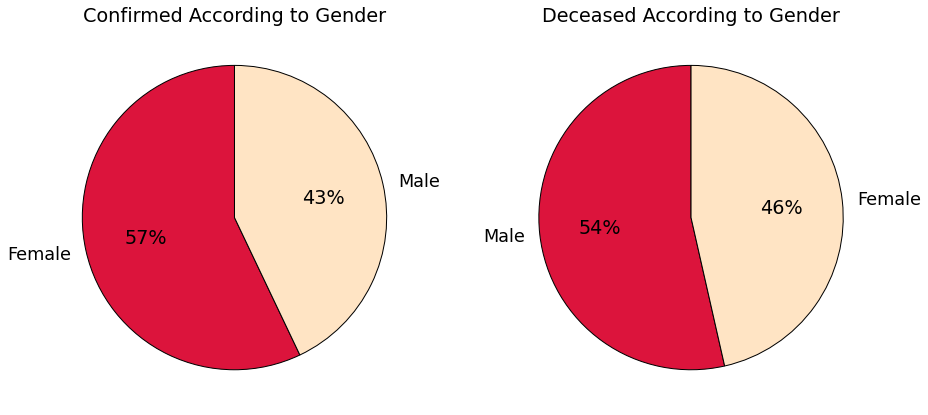

In [33]:
sns.set_context("paper", font_scale=2.0)

data_confirmed = [confirmed.loc[0, "Confirmed"], confirmed.loc[1, "Confirmed"]]
labels_confirmed = ["Female", "Male"]
colors_confirmed = [spec_lev1, ord_color]

data_deceased = [deceased.loc[1, "Deceased"], deceased.loc[0, "Deceased"]]
labels_deceased = ["Male", "Female"]
colors_deceased = [spec_lev1, ord_color]


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))

ax1.set_title("Confirmed According to Gender")
ax1.pie(
    data_confirmed,
    labels=labels_confirmed,
    colors=colors_confirmed,
    autopct="%0.0f%%",
    startangle=90,
    wedgeprops={"edgecolor": "black", "linewidth": 1},
)


ax2.set_title("Deceased According to Gender")
ax2.pie(
    data_deceased,
    labels=labels_deceased,
    colors=colors_deceased,
    autopct="%0.0f%%",
    startangle=90,
    wedgeprops={"edgecolor": "black", "linewidth": 1},
);